کدوم دسته‌بندی (Category) بیشترین فروش رو داره؟
بیشترین فروش در کدوم کشور یا شهر بوده؟
ترند فروش در طول زمان (Date vs Amount).
تحلیل سفارش‌ها بر اساس Fulfilment یا Courier Status.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
amazon = pd.read_csv("/Users/nikoo/Documents/analys project/E-Commerce Sales Analysis (Amazon-style)/Amazon sale Report.csv",encoding="latin-1")
amazon



/var/folders/h7/dvbyn7xs3mjcftnnj9sk0sbw0000gn/T/ipykernel_20750/1393976816.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv("/Users/nikoo/Documents/analys project/E-Commerce Sales Analysis (Amazon-style)/Amazon sale Report.csv",encoding="latin-1")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [6]:
print(amazon.columns)


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


In [7]:
most_sales = amazon.groupby("Category")["Amount"].mean().sort_values(ascending= False)
most_sales

Category
Set              833.385571
Saree            799.572645
Western Dress    762.790580
Ethnic Dress     723.895389
Top              526.098603
Blouse           520.327106
kurta            455.927108
Bottom           358.733286
Dupatta          305.000000
Name: Amount, dtype: float64

In [8]:
most_sales_city = amazon.groupby("ship-city")["Amount"].mean().sort_values(ascending= False)
most_sales_city

ship-city
RAJGARH CHURU DISTRICT    2372.0
Amrath                    1698.0
Ithepalli, Chandragiri    1671.0
Mandya distic             1648.0
Jashpurnagar              1613.0
                           ...  
katpadi                      NaN
koperkhairne                 NaN
merta city                   NaN
mirzapur                     NaN
ukhra                        NaN
Name: Amount, Length: 8955, dtype: float64

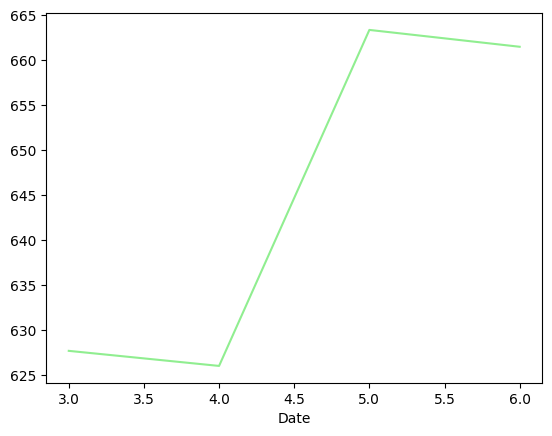

In [11]:
amazon["Date"] = pd.to_datetime(amazon["Date"])
date_vs_amount = amazon.groupby(amazon["Date"].dt.month)["Amount"].mean()
date_vs_amount
trend_amount_chart = sns.lineplot(x = date_vs_amount.index, y = date_vs_amount.values, color = "lightgreen")

In [12]:
amount_vs_fulfilment = amazon.groupby("Fulfilment")["Amount"].sum().sort_values(ascending= False)
amount_vs_fulfilment

Fulfilment
Amazon      54322151.0
Merchant    24270527.3
Name: Amount, dtype: float64

In [14]:
count_vs_fulfilment = amazon["Fulfilment"].value_counts()
count_vs_fulfilment

Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64